Возможные пары, данные за 5 лет, необходимо выбрать хотя бы 2:
SPX&GLD
KO&PEP
F&GM
Сравниваем между собой столбцы adj close данных стоков

# Задание 1. Проверить данные на линейную зависимость. Для каждой пары – посчитать корреляционную и ковариационную матрицу.


In [1]:
import pandas as pd
import datetime
import yfinance as yf

In [2]:
hist_SPX = yf.download('SPX')
hist_SPX.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-02,1.74884,2.49834,1.74884,2.49834,2.49834,2562
2000-03-03,1.87375,1.87375,1.87375,1.87375,1.87375,80
2000-03-06,2.49834,2.49834,2.49834,2.49834,2.49834,240
2000-03-07,4.37209,4.37209,4.37209,4.37209,4.37209,0
2000-03-08,4.37209,4.37209,4.37209,4.37209,4.37209,0


In [3]:
hist_GLD = yf.download('GLD')
hist_GLD.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000
2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300
2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000
2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200
2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100


In [4]:
hist_KO = yf.download('KO')
hist_KO.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.048528,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.047447,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.047807,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.046726,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.046246,2035200


In [5]:
hist_PEP = yf.download('PEP')
hist_PEP.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,0.000000,1.601852,1.583333,1.601852,0.408702,318600
1972-06-02,1.601852,1.618056,1.597222,1.597222,0.407520,140400
1972-06-05,1.597222,1.599537,1.543981,1.574074,0.402782,469800
1972-06-06,1.560185,1.560185,1.555556,1.560185,0.399228,140400
1972-06-07,1.560185,1.562500,1.546296,1.550926,0.396859,178200


In [6]:
type(hist_PEP['Adj Close'])

pandas.core.series.Series

# Correlation Matrix and Covariance Matrix for SPX&GLD Adj Close

In [7]:
ts1 = hist_SPX['Adj Close']
ts2 = hist_GLD['Adj Close']


df = pd.concat([ts1, ts2], axis=1)
df.columns = ['ts1', 'ts2']

correlation_matrix = df.corr()
covariance_matrix = df.cov()


print("Correlation Matrix:")
print(correlation_matrix)

print("Covariance Matrix:")
print(covariance_matrix)

Correlation Matrix:
          ts1       ts2
ts1  1.000000 -0.647361
ts2 -0.647361  1.000000
Covariance Matrix:
           ts1          ts2
ts1   1.055911   -15.662623
ts2 -15.662623  1502.323490


In [8]:
correlation_matrix

,ts1,ts2
ts1,1.000000,-0.647361
ts2,-0.647361,1.000000


In [9]:
covariance_matrix

,ts1,ts2
ts1,1.055911,-15.662623
ts2,-15.662623,1502.323490


# Correlation Matrix and Covariance Matrix for KO&PEP Adj Close

In [10]:
ts3 = hist_KO['Adj Close']
ts4 = hist_PEP['Adj Close']


df = pd.concat([ts3, ts4], axis=1)
df.columns = ['ts3', 'ts4']

correlation_matrix_ = df.corr()
covariance_matrix_ = df.cov()


print("Correlation Matrix:")
print(correlation_matrix_)

print("Covariance Matrix:")
print(covariance_matrix_)

Correlation Matrix:
          ts3       ts4
ts3  1.000000  0.980534
ts4  0.980534  1.000000
Covariance Matrix:
            ts3          ts4
ts3  245.697596   693.701847
ts4  693.701847  1927.333407


In [11]:
correlation_matrix_

,ts3,ts4
ts3,1.000000,0.980534
ts4,0.980534,1.000000


In [12]:
covariance_matrix_

,ts3,ts4
ts3,245.697596,693.701847
ts4,693.701847,1927.333407


# Задание 2. С помощью теста хи-квадрат на независимость проверить независимость или возможную зависимость двух стоков.


In [13]:
print(ts1.shape, ts2.shape)

(4489,) (4763,)


In [14]:
print(ts3.shape, ts4.shape)

(15558,) (12959,)


In [15]:
ts2 = ts2[:4489]
ts3 = ts3[:12959]

In [16]:
print(ts1.shape, ts2.shape)
print(ts3.shape, ts4.shape)

(4489,) (4489,)
(12959,) (12959,)


In [17]:
ts3

Date
1962-01-02     0.048528
1962-01-03     0.047447
1962-01-04     0.047807
1962-01-05     0.046726
1962-01-08     0.046246
                ...    
2013-06-19    29.234938
2013-06-20    28.308916
2013-06-21    28.764681
2013-06-24    28.598291
2013-06-25    28.735746
Name: Adj Close, Length: 12959, dtype: float64

In [18]:
import numpy as np
from scipy.stats import chi2_contingency

def are_time_series_independent(series1, series2, significance_level=0.05):
    data = np.array([series1, series2])
    chi2, p, _, _ = chi2_contingency(data)
    return p > significance_level

independent = are_time_series_independent(ts1, ts2)
print("Are the SPX&GLD time series independent?", independent)

independent_ = are_time_series_independent(ts3, ts4)
print("Are the KO&PEP time series independent?", independent)

Are the SPX&GLD time series independent? False
Are the KO&PEP time series independent? False


# Задание 3. Построить для пар стоков scatter plot

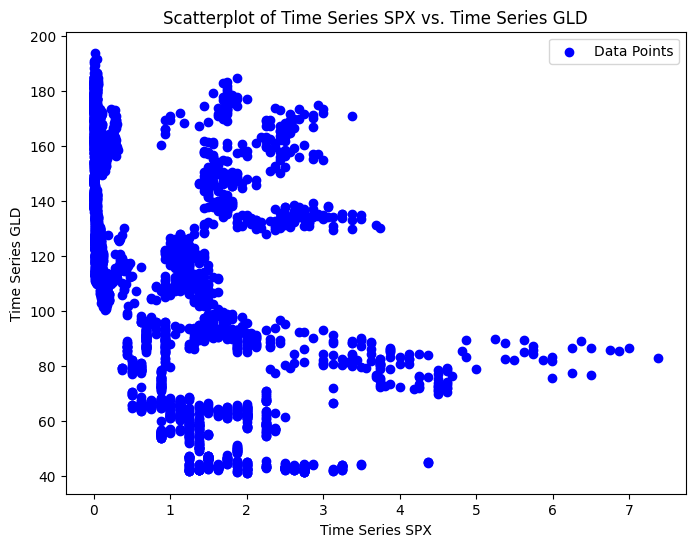

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(ts1, ts2, color='blue', marker='o', label='Data Points')

plt.xlabel('Time Series SPX')
plt.ylabel('Time Series GLD')
plt.title('Scatterplot of Time Series SPX vs. Time Series GLD')

plt.legend()
plt.show()

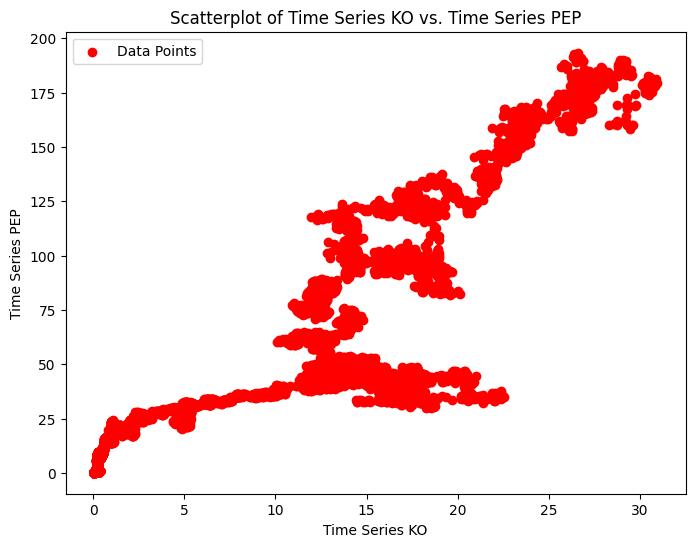

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(ts3, ts4, color='red', marker='o', label='Data Points')

plt.xlabel('Time Series KO')
plt.ylabel('Time Series PEP')
plt.title('Scatterplot of Time Series KO vs. Time Series PEP')

plt.legend()
plt.show()